In [1]:
# MODEL = "meta-llama/Llama-2-7b-hf"
MODEL = "meta-llama/Meta-Llama-3.1-8B"

In [2]:
import wandb
import numpy as np

# Initialize W&B API client
api = wandb.Api()

# Fetch runs from your project
project_runs = api.runs("rock-and-roll/edenn-evals")

# Placeholder for confusion matrix values
rtn_mses, rtn_ppls, rtn_bitwidhts = [], [], []

# Iterate over runs and extract confusion matrix data
for run in project_runs:
    # This is a placeholder; you'll need to adjust it based on how you've logged your data
    model = run.summary.get("model")
    mse = run.summary.get("expected_mse")
    ppl = run.summary.get("wikitext2_PPL")
    bitwidht = run.summary.get("bitwidth")
    
    # print(f"{model=} {mse=} {ppl=}")
    if mse is not None and ppl is not None and run.name.split(",")[0].split("=")[1][1:-1] == MODEL:
        rtn_mses.append(mse)
        rtn_ppls.append(ppl)
        rtn_bitwidhts.append(bitwidht)
        
rtn_mses = np.asarray(rtn_mses)
rtn_ppls = np.asarray(rtn_ppls)
rtn_bitwidhts = np.asarray(rtn_bitwidhts)

In [3]:
import wandb
import numpy as np

# Initialize W&B API client
api = wandb.Api()

# Fetch runs from your project
project_runs = api.runs("rock-and-roll/edenn-gptq")

# Placeholder for confusion matrix values
gptq_mses, gptq_ppls, gptq_bitwidhts = [], [], []

# Iterate over runs and extract confusion matrix data
for run in project_runs:
    # This is a placeholder; you'll need to adjust it based on how you've logged your data
    model = run.summary.get("model")
    mse = run.summary.get("expected_mse")
    ppl = run.summary.get("wikitext2_PPL")
    bitwidht = run.summary.get("bitwidth")
    
    # print(f"{model=} {mse=} {ppl=}")
    if mse is not None and ppl is not None and run.name.split(",")[0].split("=")[1][1:-1] == MODEL:
        gptq_mses.append(mse)
        gptq_ppls.append(ppl)
        gptq_bitwidhts.append(bitwidht)
        
gptq_mses = np.asarray(gptq_mses)
gptq_ppls = np.asarray(gptq_ppls)
gptq_bitwidhts = np.asarray(gptq_bitwidhts)

In [4]:
import wandb
import numpy as np

# Initialize W&B API client
api = wandb.Api()

# Fetch runs from your project
project_runs = api.runs("rock-and-roll/NOISY_MSE_GALQIWI")

# Placeholder for confusion matrix values
noisy_mses, noisy_ppls = [], []

# Iterate over runs and extract confusion matrix data
for run in project_runs:
    # This is a placeholder; you'll need to adjust it based on how you've logged your data
    mse = run.summary.get("relative_mse")
    ppl = run.summary.get("wikitext2")
    
    # print(f"{model=} {mse=} {ppl=}")
    if mse is not None and ppl is not None and run.name == MODEL.split("/")[-1]:
        noisy_mses.append(float(mse))
        noisy_ppls.append(float(ppl))

noisy_mses = np.asarray(noisy_mses)
noisy_ppls = np.asarray(noisy_ppls)

Text(0.5, 1.0, 'meta-llama/Meta-Llama-3.1-8B')

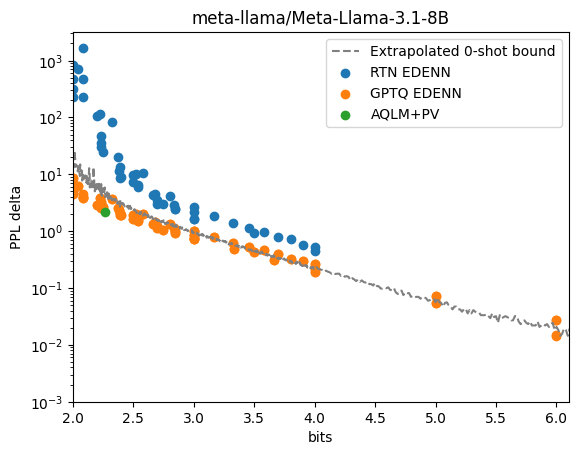

In [5]:
import matplotlib.pyplot as plt
import numpy as np


noisy_bitwidhts = - np.log2(noisy_mses) / 2
noisy_bitwidhts_order = np.argsort(noisy_bitwidhts)
plt.plot(
    noisy_bitwidhts[noisy_bitwidhts_order], noisy_ppls[noisy_bitwidhts_order] - np.min(rtn_ppls),
    color="gray", linestyle="--", label="Extrapolated 0-shot bound",
)


plt.scatter(
    rtn_bitwidhts, rtn_ppls - np.min(rtn_ppls),
    label="RTN EDENN",
)

plt.scatter(
    gptq_bitwidhts, gptq_ppls - np.min(rtn_ppls),
    label="GPTQ EDENN",
)

if MODEL == "meta-llama/Meta-Llama-3.1-8B":
    plt.scatter(
        [2.27], [7.75 - np.min(rtn_ppls)],
        label="AQLM+PV",
    )
elif MODEL == "meta-llama/Llama-2-7b-hf":
    plt.scatter(
        [2.02, 2.29], [5.84 - np.min(rtn_ppls), 5.678532600402832 - np.min(rtn_ppls)],
        label="AQLM+PV",
    )
    plt.scatter(
        [2.02, 2.29, 3.04, 4.04], [6.688191890716553 - np.min(rtn_ppls), 5.922969818115234 - np.min(rtn_ppls), 5.46 - np.min(rtn_ppls), 5.21 - np.min(rtn_ppls)],
        label="AQLM",
    )
    plt.scatter(
        [2.00, 3.00, 4.00], [5.91 - np.min(rtn_ppls), 5.29 - np.min(rtn_ppls), 5.17 - np.min(rtn_ppls)],
        label="QTIP",
    )

plt.yscale("log")
plt.xlim(2, 6.1)
plt.ylim(10**-3, 10**3.5)

plt.xlabel("bits")
plt.ylabel("PPL delta")
plt.legend()
plt.title(MODEL)

In [6]:
print(np.min(rtn_ppls))

5.606886386871338


In [7]:
# MODEL = "meta-llama/Llama-2-7b-hf"
MODEL = "meta-llama/Meta-Llama-3.1-8B"

import wandb
import numpy as np
from tqdm.auto import tqdm

# Initialize W&B API client
api = wandb.Api()

# Fetch runs from your project
project_runs = api.runs("rock-and-roll/NOISY_MSE_ONE_LAYER_GALQIWI_PPL")

# Placeholder for confusion matrix values
mses, ppls, bitwidhts, block_ids = [], [], [], []

# Iterate over runs and extract confusion matrix data
for run in tqdm(project_runs):
    # This is a placeholder; you'll need to adjust it based on how you've logged your data
    model = run.config.get("base_model")
    mse = run.summary.get("relative_mse")
    ppl = run.summary.get("wikitext2")
    bitwidht = run.summary.get("effective_wbits")
    block_id = run.config.get("layer_idx")
    
    # print(f"{model=} {block_id=} {mse=} {ppl=}")
    if mse is not None and ppl is not None:
        mses.append(mse)
        ppls.append(ppl)
        bitwidhts.append(bitwidht)
        block_ids.append(block_id)
        
mses = np.asarray(mses)
ppls = np.asarray(ppls)
bitwidhts = np.asarray(bitwidhts)
block_ids = np.asarray(block_ids)

order = np.argsort(mses)
mses = mses[order]
ppls = ppls[order]
bitwidhts = bitwidhts[order]
block_ids = block_ids[order]

  0%|          | 0/9305 [00:00<?, ?it/s]

Text(0, 0.5, 'PPL')

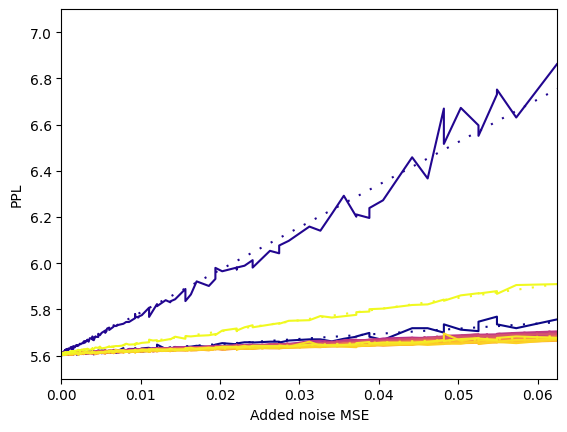

In [8]:
from scipy.stats import linregress

import matplotlib.pyplot as plt
import matplotlib as mpl

slopes = np.empty((32,))

cmap = mpl.colormaps["plasma"]

for block_id in range(32):
    this_layer_pos = (block_ids == block_id)
    
    plt.plot(
        mses[this_layer_pos],
        ppls[this_layer_pos],
        label=f"{block_id}",
        color=cmap(block_id/31),
    )
    
    this_layer_pos = (block_ids == block_id) & (mses <= 4**(-2))
    fit = linregress(mses[this_layer_pos], ppls[this_layer_pos])
    
    plt.plot(
        np.linspace(0, 4**(-2)),
        fit.intercept + fit.slope * np.linspace(0, 4**(-2)),
        color=cmap(block_id/31),
        linestyle=(0, (1, 5)),
    )
    slopes[block_id] = fit.slope

    # plt.yscale("log")

plt.xlim(0, 4**(-2))
plt.ylim(5.5, 7.1)

plt.xlabel("Added noise MSE")
plt.ylabel("PPL")

Text(0.5, 1.0, 'Optimal block-wise BPW, meta-llama/Meta-Llama-3.1-8B')

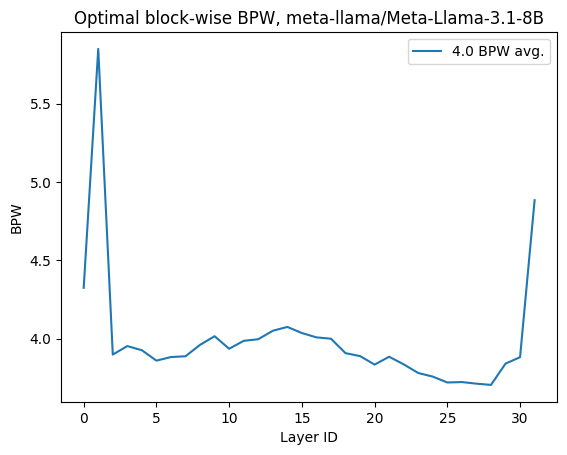

In [9]:
from scipy.optimize import minimize


def get_optimal_blockwise_bitwidths(slopes, budget):
    bitwidhts = np.log2(slopes) / 2
    return bitwidhts - bitwidhts.mean() + budget


def expected_ppl_gap(slopes, allocated_bitwidths):
    return np.sum(slopes * np.power(4, -allocated_bitwidths))

for budget in (4.0,):
    plt.plot(get_optimal_blockwise_bitwidths(slopes, budget), label=f"{budget} BPW avg.")
    
plt.xlabel("Layer ID")
plt.ylabel("BPW")

plt.legend()
plt.title(f"Optimal block-wise BPW, {MODEL}")

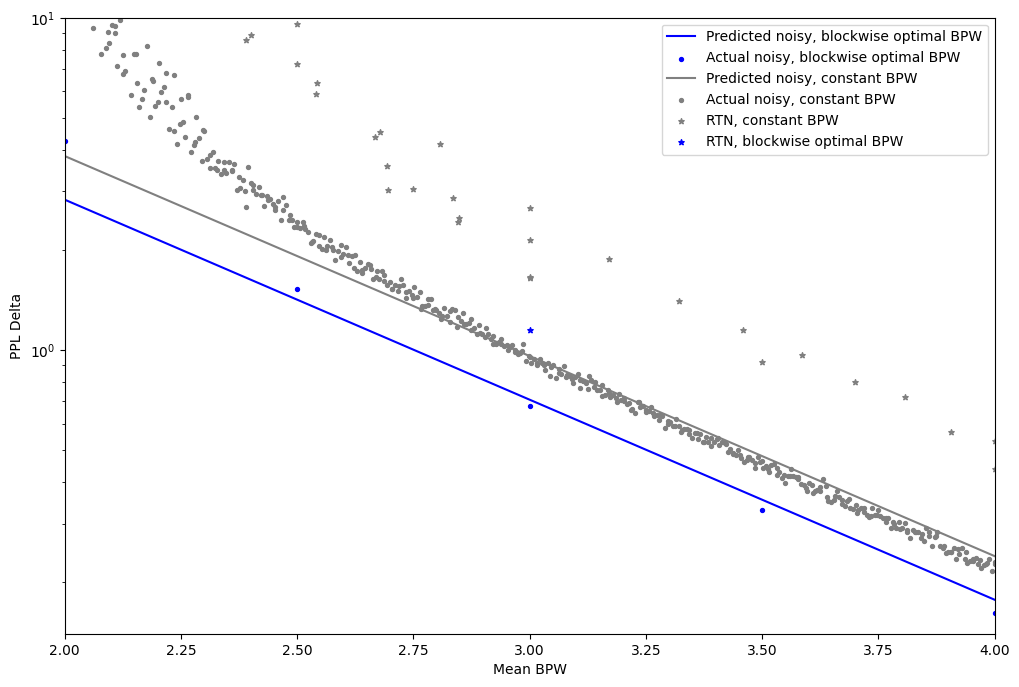

In [10]:
plt.rcParams['figure.figsize'] = [12, 8]

bpws = [2, 2.5, 3, 3.5, 4.0]
actual = [9.854679107666016, 7.133002281188965, 6.286427021026611, 5.935948848724365, 5.768750190734863]
rtn = [None, None, 6.754897594451904, None, None]

# NOISE BLOCKWISE BPW
plt.plot(
    np.linspace(2, 4),
    [expected_ppl_gap(slopes, get_optimal_blockwise_bitwidths(slopes, bpw)) for bpw in np.linspace(2, 4)],
    color="blue", label="Predicted noisy, blockwise optimal BPW",
)
plt.scatter(bpws, actual  - np.min(rtn_ppls), s=8, color="blue", label="Actual noisy, blockwise optimal BPW")


# NISE CONSTANT BPW
plt.plot(
    np.linspace(2, 4),
    [expected_ppl_gap(slopes, np.array([bpw for _ in range(32)])) for bpw in np.linspace(2, 4)],
    color="gray", label="Predicted noisy, constant BPW",
)
plt.scatter(
    noisy_bitwidhts[noisy_bitwidhts_order], noisy_ppls[noisy_bitwidhts_order] - np.min(rtn_ppls),
    color="gray", s=8, label="Actual noisy, constant BPW",
)

# GPTQ
# plt.scatter(
#     gptq_bitwidhts, gptq_ppls - np.min(rtn_ppls), 
#     color="green", marker="*", s=16, label="GPTQ, constant BPW",
# )

# RTN CONSTANT BPW
plt.scatter(
    rtn_bitwidhts, rtn_ppls - np.min(rtn_ppls),
    color="gray", s=16, marker="*", label="RTN, constant BPW",
)

# RTN OPTIMAL BPW
plt.scatter(
    [3.0], 6.754897594451904 - np.min(rtn_ppls),
    color="blue", s=16, marker="*", label="RTN, blockwise optimal BPW",
)

plt.xlabel("Mean BPW")
plt.ylabel("PPL Delta")

plt.yscale("log")
plt.xlim(2, 4)
plt.ylim(0.14, 10)

plt.legend()

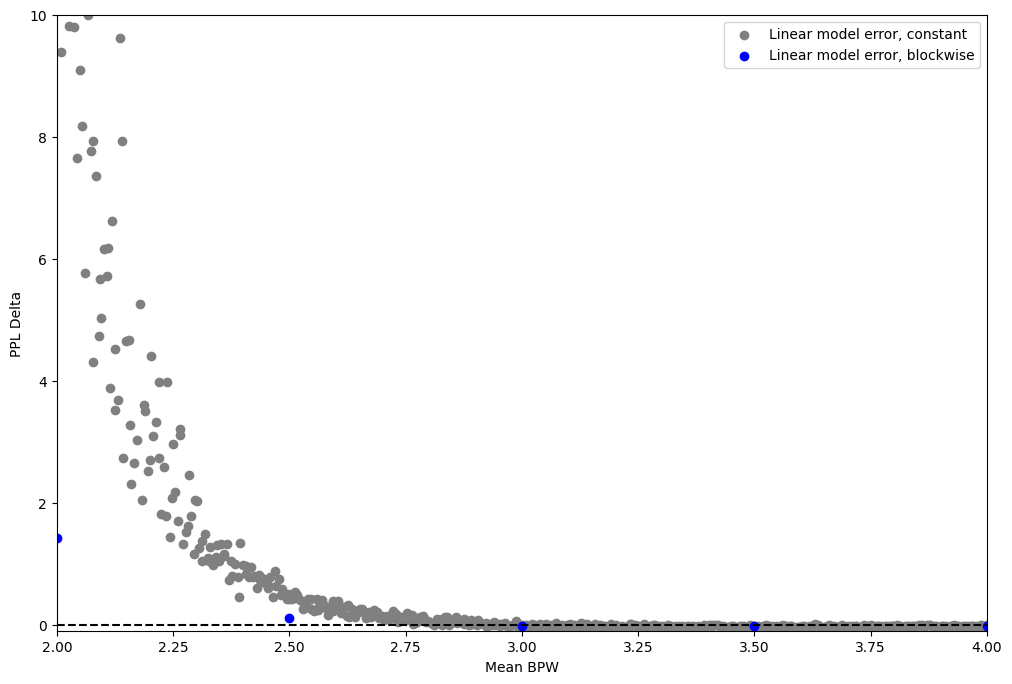

In [11]:
linear_model_constant_ppls = np.asarray([expected_ppl_gap(slopes, np.array([bpw for _ in range(32)])) for bpw in noisy_bitwidhts[noisy_bitwidhts_order]])

plt.scatter(
    noisy_bitwidhts[noisy_bitwidhts_order], (noisy_ppls[noisy_bitwidhts_order] - np.min(rtn_ppls)) - linear_model_constant_ppls,
    color="gray", label="Linear model error, constant",
)
plt.scatter(
    bpws, (actual - np.min(rtn_ppls)) - np.asarray([expected_ppl_gap(slopes, get_optimal_blockwise_bitwidths(slopes, bpw)) for bpw in bpws]),
    color="blue", label="Linear model error, blockwise",
)
plt.axhline(0, color="black", linestyle="--")

plt.xlabel("Mean BPW")
plt.ylabel("PPL Delta")

plt.xlim(2, 4)
plt.ylim(-0.1, 10)

plt.legend()

In [12]:
import math
from os import listdir
from os.path import isfile, join

for i in range(16):
    assert int(math.log2(2**i)) == i

grids_path = "../grids"
grids = [f for f in listdir(grids_path) if isfile(join(grids_path, f))]

good_grids = []

for grid in sorted(grids):
    grid_signature = grid[4:-3].split("-")
    edenn_d = int(grid_signature[0])
    edenn_n = int(grid_signature[1])
    
    print(f"{edenn_d} {edenn_n}:", end=" ")
    if edenn_n & (edenn_n-1) != 0:
        print(f"not power of 2")
        continue
    
    if edenn_n * edenn_d * 2 > 64 * 1024:
        print(f"too large")
        continue
    
    print("good")
    good_grids.append((edenn_d, edenn_n))

1 10: not power of 2
1 11: not power of 2
1 12: not power of 2
1 13: not power of 2
1 14: not power of 2
1 15: not power of 2
1 16: good
1 2: good
1 256: good
1 3: not power of 2
1 32: good
1 4: good
1 5: not power of 2
1 6: not power of 2
1 64: good
1 7: not power of 2
1 8: good
1 9: not power of 2
10 1142: not power of 2
10 137: not power of 2
10 16: good
10 2: good
10 3290: not power of 2
10 396: not power of 2
10 47: not power of 2
10 5: not power of 2
2 1024: good
2 11: not power of 2
2 128: good
2 14: not power of 2
2 16: good
2 17: not power of 2
2 2: good
2 22: not power of 2
2 256: good
2 27: not power of 2
2 3: not power of 2
2 32: good
2 33: not power of 2
2 4: good
2 4096: good
2 41: not power of 2
2 5: not power of 2
2 51: not power of 2
2 6: not power of 2
2 64: good
2 7: not power of 2
2 8: good
2 9: not power of 2
3 1024: good
3 104: not power of 2
3 11: not power of 2
3 143: not power of 2
3 15: not power of 2
3 16: good
3 197: not power of 2
3 2: good
3 2048: good
3 2

In [13]:
%env CUDA_VISIBLE_DEVICES=7

import torch
from edenn import higgs_quantize_dequantize

@torch.no_grad()
def eval_grid(edenn_d: int, edenn_n: int):
    x = torch.empty((2**18, edenn_d), device="cuda").normal_()
    dequant, entropy = higgs_quantize_dequantize(x, edenn_d, edenn_n)
    mse = (x - dequant).pow(2).mean().item()
    return mse, entropy / edenn_d

good_grids_with_mse = []
for (edenn_d, edenn_n) in good_grids:
    mse, entropy = eval_grid(edenn_d, edenn_n)
    good_grids_with_mse.append({
            "name": f"edenn_{edenn_d}_{edenn_n}",
            "mse": mse, "bits": math.log2(edenn_n) / edenn_d,
            "edenn_d": edenn_d, "edenn_n": edenn_n, "entropy": entropy
    })

env: CUDA_VISIBLE_DEVICES=7


In [14]:
from e8p2 import QUIP_SHARP_QUANTIZER_2
from e8p3 import QUIP_SHARP_QUANTIZER_3
from e8p4 import QUIP_SHARP_QUANTIZER_4

with torch.no_grad():
    x = torch.empty((2**18, 8), device="cuda").normal_()
    dequant = QUIP_SHARP_QUANTIZER_2.quantize(x, return_idx=False)
    quip_sharp_2_mse = (x - dequant).pow(2).mean().item()
    
    dequant = QUIP_SHARP_QUANTIZER_3.quantize(x, return_idx=False)
    quip_sharp_3_mse = (x - dequant).pow(2).mean().item()
    
    dequant = QUIP_SHARP_QUANTIZER_4.quantize(x, return_idx=False)
    quip_sharp_4_mse = (x - dequant).pow(2).mean().item()
    
    quip_sharp_grids = [
        {"name": "quipsharp_2", "mse": quip_sharp_2_mse, "bits": 2},
        {"name": "quipsharp_3", "mse": quip_sharp_3_mse, "bits": 3},
        {"name": "quipsharp_4", "mse": quip_sharp_4_mse, "bits": 4},
    ]

In [15]:
bnb_grids = [
    {"name": "nf4", "mse": 0.0001688, "bits": 8 + 16 / 4096},
    {"name": "int8", "mse": 0.008422, "bits": 4 + 16 / 64},
]

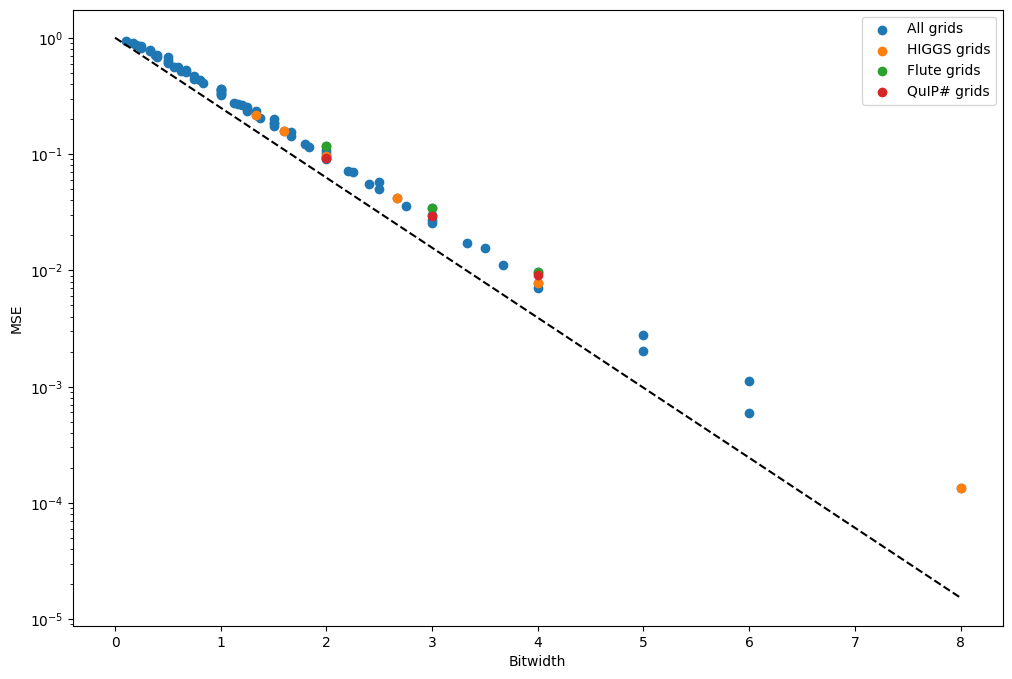

In [16]:
import numpy as np
import matplotlib.pyplot as plt

higgs_grids = [grid for grid in good_grids_with_mse if grid['edenn_n'] == 256 and grid['bits'] >= 1.3]
flute_grids = [grid for grid in good_grids_with_mse if grid["edenn_n"] in [4, 8, 16] and grid["edenn_d"] == 1]
combo_grids = flute_grids + bnb_grids # + quip_sharp_grids

plt.scatter([v["bits"] for v in good_grids_with_mse], [v["mse"] for v in good_grids_with_mse], label="All grids")
plt.scatter([v["bits"] for v in higgs_grids], [v["mse"] for v in higgs_grids], label="HIGGS grids")
plt.scatter([v["bits"] for v in flute_grids], [v["mse"] for v in flute_grids], label="Flute grids")
plt.scatter([v["bits"] for v in quip_sharp_grids], [v["mse"] for v in quip_sharp_grids], label="QuIP# grids")

plt.plot(np.linspace(0, 8), np.power(4, -np.linspace(0, 8)), linestyle="--", color="black")

plt.xlabel("Bitwidth")
plt.ylabel("MSE")

plt.yscale("log")

plt.legend()

In [17]:
from ortools.linear_solver import pywraplp

def find_grids_with_budget(
    slopes,    # linear coefficients for [layerwise mse -> metric]
    weights,   # linear coefficients for [layer bitwidth -> total bitwidth] (1 / num_blocks for blockwise)
    budget,    # upper bound on total bitwidth
    grid_bits, # available grid bitwidths
    grid_mses  # available grid mses
) -> tuple[float, list]:
    num_layers = len(slopes)
    num_grids = len(grid_bits)
    assert len(grid_mses) == num_grids
    
    solver = pywraplp.Solver.CreateSolver("CP-SAT")

    x = {(j, i) : solver.BoolVar("name") for i in range(num_grids) for j in range(num_layers)}
    
    for j in range(num_layers) : solver.Add(sum(x[(j, i)] for i in range(num_grids)) == 1)
    solver.Add(sum(x[(j, i)] * weights[j] * grid_bits[i] for j in range(num_layers) for i in range(num_grids)) <= budget + 1e-5)
    solver.Minimize(sum(x[(j, i)] * slopes[j] * grid_mses[i] for j in range(num_layers) for i in range(num_grids)))

    status = solver.Solve()
    if status == pywraplp.Solver.OPTIMAL:
        avg_bits = sum(x[(j, i)].solution_value() * weights[j] * grid_bits[i] for j in range(num_layers) for i in range(num_grids))
        solution = np.asarray([[x[(j, i)].solution_value() for i in range(num_grids)] for j in range(num_layers)])
        indices = np.argwhere(solution == 1.0)
        assert len(indices) == num_layers
        return avg_bits, indices[:,1]
    else:
        raise Exception("Didn't solve")

Processing bitwidths...:   0%|          | 0/20 [00:00<?, ?it/s]

Text(0, 0.5, 'Selected Bitwidht')

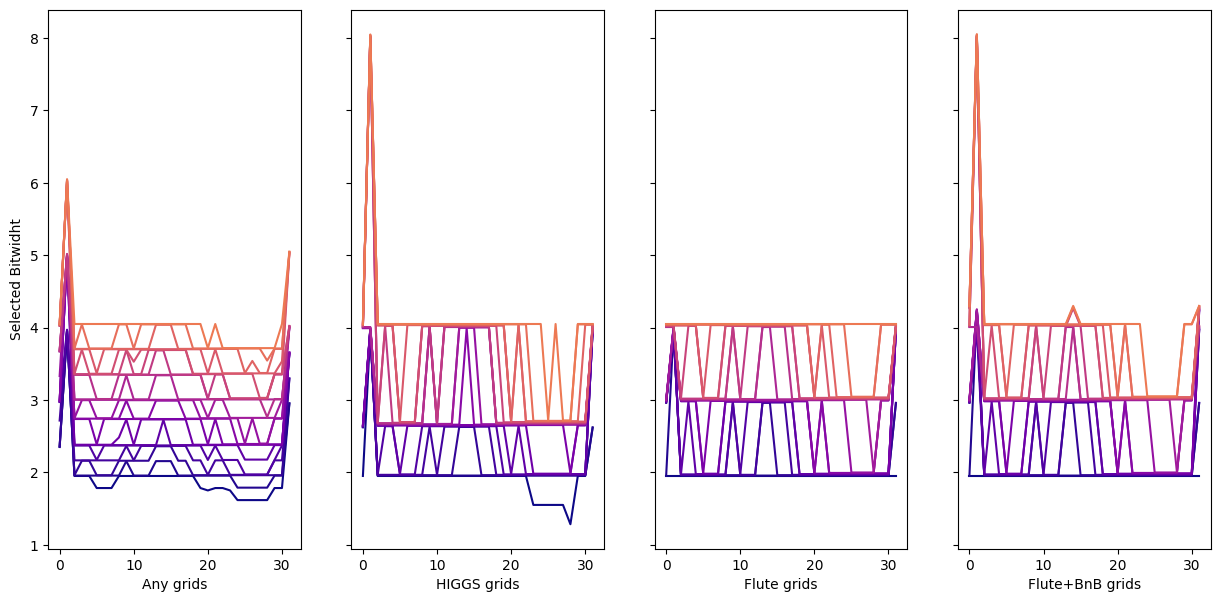

In [18]:
cmap = mpl.colormaps["plasma"]

any_configurations = set()
higgs_configurations = set()
flute_configurations = set()
quip_sharp_configurations = set()
combo_configurations = set()

fig, axs = plt.subplots(1, 4, figsize=(15, 7), sharey=True)

for target_bitwidht in tqdm(np.linspace(2.0, 4.0, num=20), desc="Processing bitwidths..."):
    # ANY
    girds_to_map_to = good_grids_with_mse # any
    avg_bits, indices = find_grids_with_budget(slopes, np.ones((32,)) / 32, target_bitwidht, [grid["bits"] for grid in girds_to_map_to], [grid["mse"] for grid in girds_to_map_to])
    if tuple(indices) not in any_configurations:
        axs[0].plot(
            np.array([girds_to_map_to[i]["bits"] for i in indices]) + 0.05 * (target_bitwidht - 3.0),
            color=cmap((target_bitwidht -  2) / (5 - 2)),
            label=f"Avg. Bitwidth: {avg_bits:.2f} < {target_bitwidht:.2f}"
        )
        any_configurations.add(tuple(indices))
    
    # HIGGS
    girds_to_map_to = higgs_grids
    avg_bits, indices = find_grids_with_budget(slopes, np.ones((32,)) / 32, target_bitwidht, [grid["bits"] for grid in girds_to_map_to], [grid["mse"] for grid in girds_to_map_to])
    if tuple(indices) not in higgs_configurations:
        axs[1].plot(
            np.array([girds_to_map_to[i]["bits"] for i in indices]) + 0.05 * (target_bitwidht - 3.0),
            color=cmap((target_bitwidht -  2) / (5 - 2)),
            label=f"Avg. Bitwidth: {avg_bits:.2f} < {target_bitwidht:.2f}"
        )
        higgs_configurations.add(tuple(indices))
        
    # FLUTE
    girds_to_map_to = flute_grids
    avg_bits, indices = find_grids_with_budget(slopes, np.ones((32,)) / 32, target_bitwidht, [grid["bits"] for grid in girds_to_map_to], [grid["mse"] for grid in girds_to_map_to])
    if tuple(indices) not in flute_configurations:
        axs[2].plot(
            np.array([girds_to_map_to[i]["bits"] for i in indices]) + 0.05 * (target_bitwidht - 3.0),
            color=cmap((target_bitwidht -  2) / (5 - 2)),
            label=f"Avg. Bitwidth: {avg_bits:.2f} < {target_bitwidht:.2f}"
        )
        flute_configurations.add(tuple(indices))
        
    # QuIP#
    girds_to_map_to = quip_sharp_grids
    avg_bits, indices = find_grids_with_budget(slopes, np.ones((32,)) / 32, target_bitwidht, [grid["bits"] for grid in girds_to_map_to], [grid["mse"] for grid in girds_to_map_to])
    if tuple(indices) not in quip_sharp_configurations:
        # axs[3].plot(
        #     np.array([girds_to_map_to[i]["bits"] for i in indices]) + 0.05 * (target_bitwidht - 3.0),
        #     color=cmap((target_bitwidht -  2) / (5 - 2)),
        #     label=f"Avg. Bitwidth: {avg_bits:.2f} < {target_bitwidht:.2f}"
        # )
        quip_sharp_configurations.add(tuple(indices))
        
    # FLUTE + bnb
    girds_to_map_to = combo_grids
    avg_bits, indices = find_grids_with_budget(slopes, np.ones((32,)) / 32, target_bitwidht, [grid["bits"] for grid in girds_to_map_to], [grid["mse"] for grid in girds_to_map_to])
    if tuple(indices) not in combo_configurations:
        axs[3].plot(
            np.array([girds_to_map_to[i]["bits"] for i in indices]) + 0.05 * (target_bitwidht - 3.0),
            color=cmap((target_bitwidht -  2) / (5 - 2)),
            label=f"Avg. Bitwidth: {avg_bits:.2f} < {target_bitwidht:.2f}"
        )
        combo_configurations.add(tuple(indices))
    
axs[0].set_xlabel("Any grids")
axs[1].set_xlabel("HIGGS grids")
axs[2].set_xlabel("Flute grids")
axs[3].set_xlabel("Flute+BnB grids")
axs[0].set_ylabel("Selected Bitwidht")

In [19]:
import wandb
import numpy as np

# Initialize W&B API client
api = wandb.Api()

# Fetch runs from your project
project_runs = api.runs("rock-and-roll/higgs-evals")

# Placeholder for confusion matrix values
higgs_ppls, higgs_blockwise_configs = [], []

# Iterate over runs and extract confusion matrix data
for run in project_runs:
    # This is a placeholder; you'll need to adjust it based on how you've logged your data
    model = run.summary.get("model")
    ppl = run.summary.get("wikitext2_PPL")
    higgs_config = run.config.get("blockwise")
    
    # print(f"{model=} {mse=} {ppl=}")
    if ppl is not None and higgs_config is not None and model == MODEL:
        higgs_ppls.append(ppl)
        higgs_blockwise_configs.append(higgs_config)
        
higgs_ppls = np.asarray(higgs_ppls)
higgs_blockwise_configs = np.asarray(higgs_blockwise_configs)

higgs_bitwisths = (np.log2(higgs_blockwise_configs[:,:,1]) / higgs_blockwise_configs[:,:,0]).mean(axis=-1)

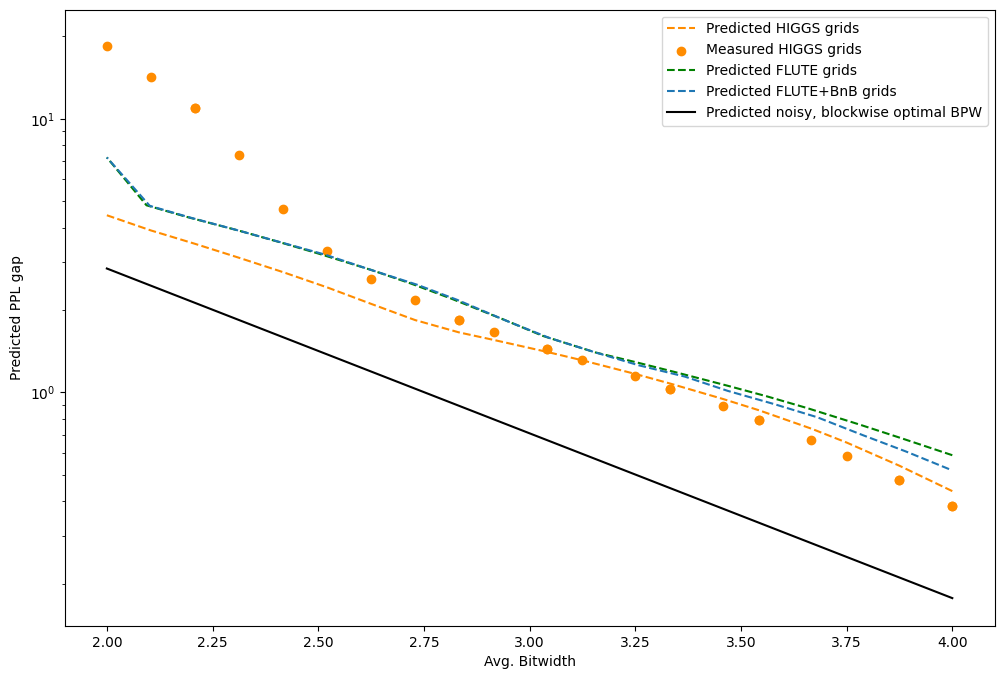

In [20]:
def get_expected_ppl_gap(slopes, grid_mses, selection):
    return (grid_mses[selection] * slopes).sum()

def get_bitwidth(weights, grid_bits, selection):
    return (weights * grid_bits[selection]).sum()

# ANY
temp_ppl_gaps = []
temp_bitwidths = []
for indices in any_configurations:
    ppl_gap = get_expected_ppl_gap(
        slopes,
        np.asarray([grid["mse"] for grid in good_grids_with_mse]),
        np.asarray(indices),
    )
    bitwidht = get_bitwidth(
        np.ones((32,)) / 32,
        np.asarray([grid["bits"] for grid in good_grids_with_mse]),
        np.asarray(indices),
    )
    
    temp_ppl_gaps.append(ppl_gap)
    temp_bitwidths.append(bitwidht)
temp_ppl_gaps = np.asarray(temp_ppl_gaps)
temp_bitwidths = np.asarray(temp_bitwidths)
order = np.argsort(temp_ppl_gaps)
# plt.plot(temp_bitwidths[order], temp_ppl_gaps[order], color="gray", linestyle="--", label=f"Predicted any grids")

# HIGGS
temp_ppl_gaps = []
temp_bitwidths = []
for indices in higgs_configurations:
    ppl_gap = get_expected_ppl_gap(
        slopes,
        np.asarray([grid["mse"] for grid in higgs_grids]),
        np.asarray(indices),
    )
    bitwidht = get_bitwidth(
        np.ones((32,)) / 32,
        np.asarray([grid["bits"] for grid in higgs_grids]),
        np.asarray(indices),
    )
    
    temp_ppl_gaps.append(ppl_gap)
    temp_bitwidths.append(bitwidht)
temp_ppl_gaps = np.asarray(temp_ppl_gaps)
temp_bitwidths = np.asarray(temp_bitwidths)
order = np.argsort(temp_ppl_gaps)
plt.plot(temp_bitwidths[order], temp_ppl_gaps[order], linestyle="--", color="darkorange", label=f"Predicted HIGGS grids")

plt.scatter(
    higgs_bitwisths,
    higgs_ppls - np.min(rtn_ppls),
    color="darkorange", marker="o", label="Measured HIGGS grids"
)

# plt.scatter(
#     [8/4, 8/3, 8/2],
#     np.asarray([300.50626, 10.31264, 6.03953]) - np.min(rtn_ppls),
#     color="orange", marker="*", label="Measured constant bpw HIGGS grids"
# )

# FLUTE
temp_ppl_gaps = []
temp_bitwidths = []
for indices in flute_configurations:
    ppl_gap = get_expected_ppl_gap(
        slopes,
        np.asarray([grid["mse"] for grid in flute_grids]),
        np.asarray(indices),
    )
    bitwidht = get_bitwidth(
        np.ones((32,)) / 32,
        np.asarray([grid["bits"] for grid in flute_grids]),
        np.asarray(indices),
    )
    
    temp_ppl_gaps.append(ppl_gap)
    temp_bitwidths.append(bitwidht)
temp_ppl_gaps = np.asarray(temp_ppl_gaps)
temp_bitwidths = np.asarray(temp_bitwidths)
order = np.argsort(temp_ppl_gaps)
plt.plot(temp_bitwidths[order], temp_ppl_gaps[order], linestyle="--", color="green", label=f"Predicted FLUTE grids")

# QuIP#
temp_ppl_gaps = []
temp_bitwidths = []
for indices in quip_sharp_configurations:
    ppl_gap = get_expected_ppl_gap(
        slopes,
        np.asarray([grid["mse"] for grid in quip_sharp_grids]),
        np.asarray(indices),
    )
    bitwidht = get_bitwidth(
        np.ones((32,)) / 32,
        np.asarray([grid["bits"] for grid in quip_sharp_grids]),
        np.asarray(indices),
    )
    
    temp_ppl_gaps.append(ppl_gap)
    temp_bitwidths.append(bitwidht)
temp_ppl_gaps = np.asarray(temp_ppl_gaps)
temp_bitwidths = np.asarray(temp_bitwidths)
order = np.argsort(temp_ppl_gaps)
# plt.plot(temp_bitwidths[order], temp_ppl_gaps[order], linestyle="--", color="blue", label=f"Predicted QuIP# grids")

# FLUTE+BnB
temp_ppl_gaps = []
temp_bitwidths = []
for indices in combo_configurations:
    ppl_gap = get_expected_ppl_gap(
        slopes,
        np.asarray([grid["mse"] for grid in combo_grids]),
        np.asarray(indices),
    )
    bitwidht = get_bitwidth(
        np.ones((32,)) / 32,
        np.asarray([grid["bits"] for grid in combo_grids]),
        np.asarray(indices),
    )
    
    temp_ppl_gaps.append(ppl_gap)
    temp_bitwidths.append(bitwidht)
temp_ppl_gaps = np.asarray(temp_ppl_gaps)
temp_bitwidths = np.asarray(temp_bitwidths)
order = np.argsort(temp_ppl_gaps)
plt.plot(temp_bitwidths[order], temp_ppl_gaps[order], linestyle="--", label=f"Predicted FLUTE+BnB grids")

# plt.scatter(
#     [4.0],
#     [6.2920427322387695 - np.min(rtn_ppls)],
#     color="red", marker="*", label="Vanilla bnb 4bit"
# )

plt.plot(
    np.linspace(2, 4),
    [expected_ppl_gap(slopes, get_optimal_blockwise_bitwidths(slopes, bpw)) for bpw in np.linspace(2, 4)],
    color="black", label="Predicted noisy, blockwise optimal BPW",
)

plt.xlabel("Avg. Bitwidth")
plt.ylabel("Predicted PPL gap")

plt.yscale('log')
plt.ylim(None, 25)

# plt.ylim(0, 2)

plt.legend()

In [21]:
import subprocess

chosen_grids = higgs_grids
chosen_configurations = higgs_configurations

for indices in tqdm(chosen_configurations):
    blockwise_string = f"""[{
        ','.join(['"'+ chosen_grids[i]['name'] + '"' for i in indices])
    }]"""
    
    # subprocess.check_call(
    #     f"CUDA_VISIBLE_DEVICES=1 python eval_real_quant.py meta-llama/Meta-Llama-3.1-8B --blockwise '{blockwise_string}' --multiquant-ckpt-path /nfs/scistore19/alistgrp/apanfero/models/higgs/Meta-Llama-3.1-8B.pt",
    #     shell=True,
    #     cwd="../kernels",
    # )

  0%|          | 0/20 [00:00<?, ?it/s]